In [34]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation,Dropout,Flatten,Dense
from keras import backend as K
import numpy as np
from keras.preprocessing import image
from keras.models import model_from_json
from matplotlib import pyplot



In [35]:
img_width,img_height =800,600
train_data_dir='data/train'
validation_data_dir='data/validation'
nb_train_samples=40
nb_validation_samples=20
epochs=40
batch_size=8

In [36]:
if K.image_data_format() == 'channels_first' :
    input_shape = (3,img_width,img_height)
else:
    input_shape = (img_width,img_height,3)

In [37]:
train_datagen = ImageDataGenerator(
    rescale=1. /255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1. / 255)

In [38]:
train_generator = train_datagen.flow_from_directory(
     train_data_dir,
     target_size=(img_width,img_height),
     batch_size=batch_size,
     class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
     validation_data_dir,
     target_size=(img_width,img_height),
     batch_size=batch_size,
     class_mode='binary')

Found 1620 images belonging to 2 classes.
Found 173 images belonging to 2 classes.


In [39]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))



model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [40]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()

history=model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,


)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 798, 598, 32)      896       
_________________________________________________________________
activation_16 (Activation)   (None, 798, 598, 32)      0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 399, 299, 32)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 397, 297, 32)      9248      
_________________________________________________________________
activation_17 (Activation)   (None, 397, 297, 32)      0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 198, 148, 32)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 196, 146, 64)     

In [45]:
model_json = model.to_json()
with open("testeasy1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("testeasy1.h5")
print("Saved model to disk")

Saved model to disk


In [41]:
img_pred=image.load_img('C:/paddy seed/data/pure1.jpg',target_size=(800,600))
img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred,axis=0)
rslt=model.predict(img_pred)
print(rslt)
if rslt[0][0] == 1:
    prediction = "pure paddy"
else:
    prediction = "impure paddy"

print(prediction)

[[1.]]
pure paddy


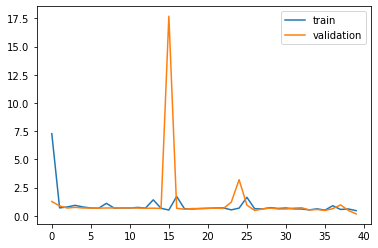

In [42]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()

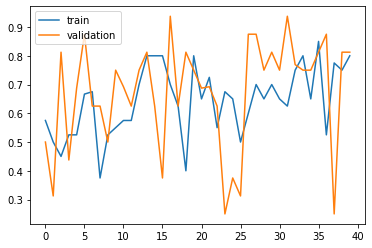

In [43]:
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='validation')
pyplot.legend()
pyplot.show()

In [44]:
model_json = model.to_json()
with open("testeasy1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("testeasy1.h5")
print("Saved model to disk")

Saved model to disk
